# 次元削減(実践 機械学習システム オライリー)
- 機械学習アルゴリズムでは、不必要な特徴量は重みを０にすればいいのでは？
- なぜ、減らしたほうがいいのか。
    1. 学習器にやさしくない（SVMは高次元空間にも対応できる）
    - パラメーターが多いと、過学習のリスクが高まる。
    - 次元をまとめられるかもしれない。
    - より高速に学習できる
    - データの可視化には、３次元が限界。
- 次元削減には、特徴量選択・特徴量抽出がある。
    - 特徴量選択を自動で行うには、「フィルター法」、「ラッパー法」などがある。
    - 特徴量抽出には、主成分分析,線形判別分析,多次元尺度構成法,etc

## 特徴量選択
1. フィルター法
- ラッパー法

### 1. フィルター法

In [7]:
from scipy.stats import pearsonr
import pandas as pd
data = [list(pearsonr([1,2,3], [1,2,3.1])), list(pearsonr([1,2,3], [1,20,6]))]
pd.DataFrame(data, columns=['相関', 'P値'])

,相関,P値
0,0.999622,0.017498
1,0.253837,0.836615


- 相関
    - 相関が高く、P値が「`低い`」説明変数が目的変数との関係性があると考えられる。
    - 相関が高くても、P値が「`高い`」ければ、目的変数との関係性は認められない。

相関は、線形的な関係性を検出するのには有効だが、それ以外ではうまくいかない。  
非線形な関係性を見るには、`相互情報量`を用いる

- 相互情報量
    - ある２つの特徴量の相互情報量が大きければ、どちらかを削除することができる。
    - 問題点
        - 計算量が膨大（変数の数^2くらい）
        - 目的変数に間接的に関係のある変数を見落としてしまう。

### 2. [ラッパー法](#RFE)
- 下のscikit-learnの使い方を参照

## 特徴抽出
1. 主成分分析 (PCA: principal component analysis)、線形な手法
- 多次元尺度構成法 (MDS: multi dimensional scaling)、非線形な手法

### 1. 主成分分析 (PCA)
- 特徴量を減らす必要があり、どの手法を用いればわからない場合、まずやるべき手法。  
- 分類・回帰どちらにも適用することができる。
- PCAの概要
    - 各データから平均値を引くことで、各データを中心にもってくる
    - 共分散行列を計算する
    - 共分散行列の固有ベクトルを計算する
- 共分散とは、２つの変数の関係性を表す値。２つの確率変数の関係性を表せる。  
「片方の変化に対応して、もう片方が変化する傾向があるのか。」
- 利点：固有ベクトルがどれくらいの分散を持つのかを知ることができる。  
その数値を降順にソートすれば、目的変数と関係性の強いものから扱える。　　

Populating the interactive namespace from numpy and matplotlib


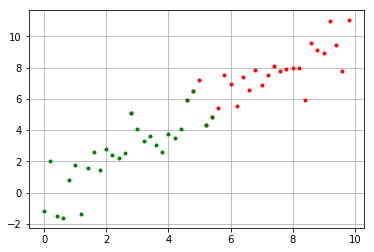

In [97]:
'''変換前'''
import numpy as np
import matplotlib.pyplot as plt
%pylab inline --no-import-all

x1 = np.arange(0, 10, 0.2)
x2 = x1+np.random.normal(loc=0, scale=1, size=len(x1))
X = np.c_[(x1, x2)]
good = np.array([x for x in X if x[0]>5 or x[1]>5])
bad = np.array([x for x in X if x[0]<5 or x[1]<5])

plt.plot(good[:, 0], good[:, 1], "r.", label="label 1")
plt.plot(bad[:, 0], bad[:, 1], "g.", label="label 2")
plt.grid()

[0.96894171]


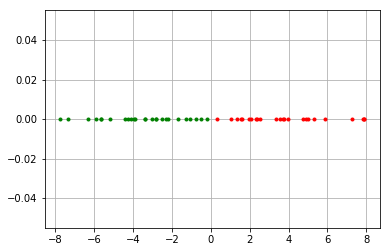

In [98]:
'''変換後'''
from sklearn import linear_model, decomposition, datasets
pca = decomposition.PCA(n_components=1)
Xtrans = pca.fit_transform(X)
print (pca.explained_variance_ratio_)

plt.plot(Xtrans[Xtrans>0], np.zeros(len( Xtrans[Xtrans>0])), "r.", label="label 1")
plt.plot(Xtrans[Xtrans<0], np.zeros(len( Xtrans[Xtrans<0])), "g.", label="label 2")
plt.grid()

`問題点として`  
- PCAは、線形な関係性しかみることができない。
- クラス分類問題には弱い。  
→線形的に同じ傾向（分散）を持つ２クラスのものを扱う場合、クラスラベルに関し、ラベルの手掛かりになる変数をみつけられない。  

`解決策　LDA`  
以下に使い方だけ。これを使えれば、クラスタリング問題のとき、非線形な関係性を持つ変数でも見つけられる。

Populating the interactive namespace from numpy and matplotlib


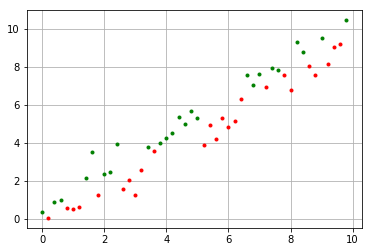

In [116]:
'''変換前'''
import numpy as np
import matplotlib.pyplot as plt
%pylab inline --no-import-all

x1 = np.arange(0, 10, 0.2)
x2 = x1+np.random.normal(loc=0, scale=1, size=len(x1))
X = np.c_[(x1, x2)]
good = X[x1>x2]
bad = X[x1<x2]

plt.plot(good[:, 0], good[:, 1], "r.", label="label 1")
plt.plot(bad[:, 0], bad[:, 1], "g.", label="label 2")
plt.grid()

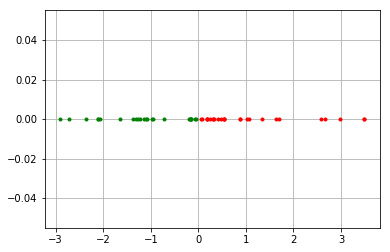

In [114]:
'''変換後'''
from sklearn import lda
lda_inst = lda.LDA(n_components=1)
Xtrans = lda_inst.fit_transform(X, good)

plt.plot(Xtrans[Xtrans>0], np.zeros(len(Xtrans[Xtrans>0])), "r.", label="label 1")
plt.plot(Xtrans[Xtrans<0], np.zeros(len(Xtrans[Xtrans<0])), "g.", label="label 2")
plt.grid()

### 2. 多次元尺度構成法 (MDS)
- データの距離を保ったまま、低次元空間（２or３）に変換する。
- データの距離には、ユークリッド距離がよく用いられる。
- データを可視化するときに使える。

----------------------
# scikit-learnの特徴量選択
- 単変量統計：各説明変数と目的変数との間の関係を計算し、最も高い確信度で関係している特徴量を選択
    - [SelectKBest](#SelectKBest): 説明変数のうち上位k個を選択する。
    - [SelectPercentile](#SelectPercentile): 説明変数のうち上位k個を選択する。引数 percentile に選択する特徴量の割合（0～100）を指定する。
    - おまけで、[GenericUnivariateSelect](#GenericUnivariateSelect)
- モデルベース特徴量選択：モデルで表される特徴量の重要性を元に特徴量を選択
    - [SelectFromModel](#SelectFromModel)
- 反復特徴量選択
    - [RFE](#RFE)
- 偏回帰係数

In [26]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
import collections
from datetime import date, datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import numpy as np

pd.set_option('display.max_columns', None) # 常に全カラム表示
pd.set_option("display.max_rows", 101) # 行数

## 単変量統計
### SelectKBest
説明変数のうち上位k個を選択する。

In [177]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest, f_regression

boston = load_boston()
X = boston.data
y = boston.target


# 5つの特徴量を選択
selector = SelectKBest(score_func=f_regression, k=5) 
selector.fit(X, y)
mask = selector.get_support()    # 各特徴量を選択したか否かのmaskを取得

# 選択した特徴量の列のみ取得
X_selected = selector.transform(X)
print("X.shape={}, X_selected.shape={}".format(X.shape, X_selected.shape))

df = pd.DataFrame({'変数': boston.feature_names,
                                    '有無': mask}, columns=['変数', '有無'])
# df.index = df.pop('変数')
df.T

X.shape=(506, 13), X_selected.shape=(506, 5)


,0,1,2,3,4,5,6,7,8,9,10,11,12
変数,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
有無,False,False,True,False,False,True,False,False,False,True,True,False,True


### SelectPercentile
説明変数のうち上位k個を選択する。引数 percentile に選択する特徴量の割合（0～100）を指定する。

In [179]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectPercentile, f_regression

boston = load_boston()
X = boston.data
y = boston.target

# 特徴量のうち40%を選択
selector = SelectPercentile(score_func=f_regression, percentile=40) 
selector.fit(X, y)
mask = selector.get_support()

# 選択した特徴量の列のみ取得
X_selected = selector.transform(X)
print("X.shape={}, X_selected.shape={}".format(X.shape, X_selected.shape))

df = pd.DataFrame({'変数': boston.feature_names,
                                    '有無': mask}, columns=['変数', '有無'])
# df.index = df.pop('変数')
df.T

X.shape=(506, 13), X_selected.shape=(506, 5)


,0,1,2,3,4,5,6,7,8,9,10,11,12
変数,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
有無,False,False,True,False,False,True,False,False,False,True,True,False,True


### GenericUnivariateSelect
mode でモード(‘percentile’, ‘k_best’, ‘fpr’, ‘fdr’, ‘fwe’) 、param で各モードのパラメータを設定する。

In [186]:
from sklearn.feature_selection import GenericUnivariateSelect
selector = GenericUnivariateSelect(mode='percentile', score_func=f_regression, param=40)
# 上と下は同じ意味
selector = SelectPercentile(score_func=f_regression, percentile=40) 

## モデルベース特徴量選択
### SelectFromModel  
引数には estimator、および閾値 threshold を指定する。

In [10]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X = boston.data
y = boston.target

# estimator として RandomForestRegressor を使用。重要度が median 以上のものを選択
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42), threshold="median")    
selector.fit(X, y)
mask = selector.get_support()

# 選択した特徴量の列のみ取得
X_selected = selector.transform(X)
print("X.shape={}, X_selected.shape={}".format(X.shape, X_selected.shape))

df = pd.DataFrame({'変数': boston.feature_names,
                                    '有無': mask}, columns=['変数', '有無'])
df.T

X.shape=(506, 13), X_selected.shape=(506, 7)


,0,1,2,3,4,5,6,7,8,9,10,11,12
変数,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
有無,True,False,False,False,True,True,False,True,False,True,True,False,True


## 反復特徴量選択 
### RFE
(recursive feature elimination: 再帰的特徴削減)   
まったく特徴量を使わないところから、ある基準が満たされるまで1つずつ重要度が高い特徴量を加えていく、もしくは、すべての特徴量を使う状態から1つずつ特徴量を取り除いていくという操作を繰り返すことで特徴量を選択する。

引数には estimator、および特徴量の数 n_features_to_select を指定する。

(特徴量数 - n_features_to_select) 回、モデル作成=>特徴量削除 が行われるので処理時間がかかる。

In [4]:
from sklearn.datasets import load_boston
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X = boston.data
y = boston.target

# estimator として RandomForestRegressor を使用。特徴量を5個選択
selector = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=5)
selector.fit(X, y)
mask = selector.get_support()

# 選択した特徴量の列のみ取得
X_selected = selector.transform(X)
print("X.shape={}, X_selected.shape={}".format(X.shape, X_selected.shape))

df = pd.DataFrame({'変数': boston.feature_names,
                                    '有無': mask}, columns=['変数', '有無'])
df.T

X.shape=(506, 13), X_selected.shape=(506, 5)


,0,1,2,3,4,5,6,7,8,9,10,11,12
変数,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
有無,True,False,False,False,True,True,False,True,False,False,False,False,True


## 偏回帰係数
- それぞれの変数がどれくらい目的変数に影響ウィオ与えているのかを知る

In [51]:
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [48]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [54]:
X = df.drop(['Price'], axis=1)
y = df['Price'].astype(int)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
# ['変数', '偏回帰係数', '限界効果']DFを作る
coeff_df = pd.DataFrame({"変数": boston.feature_names,
                                    "回帰係数": clf.coef_[0]
                   }, columns=['変数', '回帰係数']).sort_values(by='回帰係数')
coeff_df.reset_index(drop=True, inplace=True)
# 回帰係数の桁数の調整（６桁に揃える）
# coeff_df['回帰係数'] = np.round(coeff_df['回帰係数'].values, 6)

In [58]:
# オッズ比の追加
Nth_power_of_odds = {
    
}

In [59]:
# オッズ比を計算する関数
def add_odds(row):
    variable, beta = row
    if variable in Nth_power_of_odds:
        n_th = Nth_power_of_odds[variable]
    else:
        n_th = 1
    return np.exp(beta)**n_th

coeff_df['限界効果'] = coeff_df[['変数', '回帰係数']].apply(add_odds, axis=1)
coeff_df.round(6) # 桁を６桁に揃える。pd.DataFrameにメソッドがあった。

,変数,回帰係数,限界効果
0,PTRATIO,-0.835133,0.433817
1,ZN,-0.227018,0.796907
2,RM,-0.220334,0.802251
3,DIS,-0.172593,0.841480
4,INDUS,-0.162511,0.850007
5,CHAS,-0.033304,0.967244
6,TAX,-0.023391,0.976880
7,NOX,-0.008680,0.991358
8,B,0.011523,1.011589
9,CRIM,0.067529,1.069861
